# <u> An Analysis of Beer, Beer Styles, and Breweries</u>
## by Carl Smith
<br>

## Investigation Overview

### Objective 1
The analysis in this report has two primary objectives. The first objective is to provide insights into different beers, beer styles, and breweries. These insights are specifically geared towards beer enthusiasts and anyone interested in more specific beer data in general. The idea here, from an application standpoint, is to find information that you can present to users that answer questions that they may be interested in. For example:    
- What are the highest rated beers, beer styles, breweries, and brewery types?
- What are the best states and cities for drinking beer?
- What top rated beers are best for different drinking situations? For example drinking throughout the day vs. wanting to drink beers with high alcohol content. 

### Objective 2

The second objective of this analysis was to look at the bivariate and multivariate correlations in the dataset. For bivariate correlations, I looked at the relationships between the five review categories (overall, aroma, appearance, palate, and taste). The main category of interest was the overall review, and its relationships to the other four categories. This is because the overall review is the reviewer's overall impression of a beer, which consequently takes into account the other four review categories.  

For multivariate correlations, I looked at the same relationships for overall reviews, except with respect to the top 10, top 50, and top 100 most active reviewers, i.e. the reviewers with the most submitted reviews. This was interesting because it revealed some interesting insights into how reviewers give review scores as a whole and individually.  
<br>
<br>
<br>

## Dataset Overview

Datasets used:
- [Beer Advocate beer reviews dataset](https://data.world/socialmediadata/beeradvocate)
- [Open Brewery DB](https://www.openbrewerydb.org/)

The primary dataset used for this analysis was the Beer Advocate dataset, while the Open Brewery DB data complimented it with additional brewery data, such as brewery type and location. After merging these two datasets and some cleaning, about 560,000 beer reviews were used for this analysis. 

In addition, there is also one feature engineered column `weighted_review`, which represents an aggregate review score of the other 5 review categories. Below I give a brief description of some key variables that I think are worth knowing for this analysis:
- `weighted_review`: engineered variable that calculates a weighted average of all 5 review categories. This is the primary review score that is listed on BeerAdvocate's website. Each weight is defined by BeerAdvocate as 20%, 24%, 6%, 10% and 40% respectively to the following review categories.    
- `review_overall`: overall review score given for overall impression of the beer. 
- `review_aroma`: review score given for any malt, hops, yeast, and other aromatics present in the beer.
- `review_appearance`: review score given for the beer's color, clarity, head retention, and lacing. 
- `review_palate`: review score given for the beer's body, carbonation, warmth, creaminess, astringency and other palate sensations. 
- `review_taste`: review score given for any malt, hops, fermentation byproducts, balance, finish or aftertaste and other flavor characteristics.
<br>
<br>
<br>

In [218]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo

pyo.init_notebook_mode()

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [198]:
beer_df_clean = pd.read_csv('export_csv/beer_df_clean.csv')

## Category Rankings

These visualizations show six categories ranked by average review score. Categories that have many data points show the top 25, while the others show every data point. You can filter through each category by using the dropdown menu. 

This visualization is meant to be a reference for any beer enthusiast who is interested in data. 

It is also worth noting the role that the errorbars play in this point plot. Essentially, they can give us a rough estimate of how many reviews were used to calculate the average review score for each data point. In other words, smaller errorbars tend to mean more reviews, while larger errorbars tend to mean less reviews. Using the errors can help us determine how much we "trust" any one average review score. Very similar to online ratings or reviews, where we may tend to trust a 5 star rating with 1,000 reviews, more than a 5 star rating with 10 reviews. 

*press down for visualizations..*
<br>
<br>
<br>

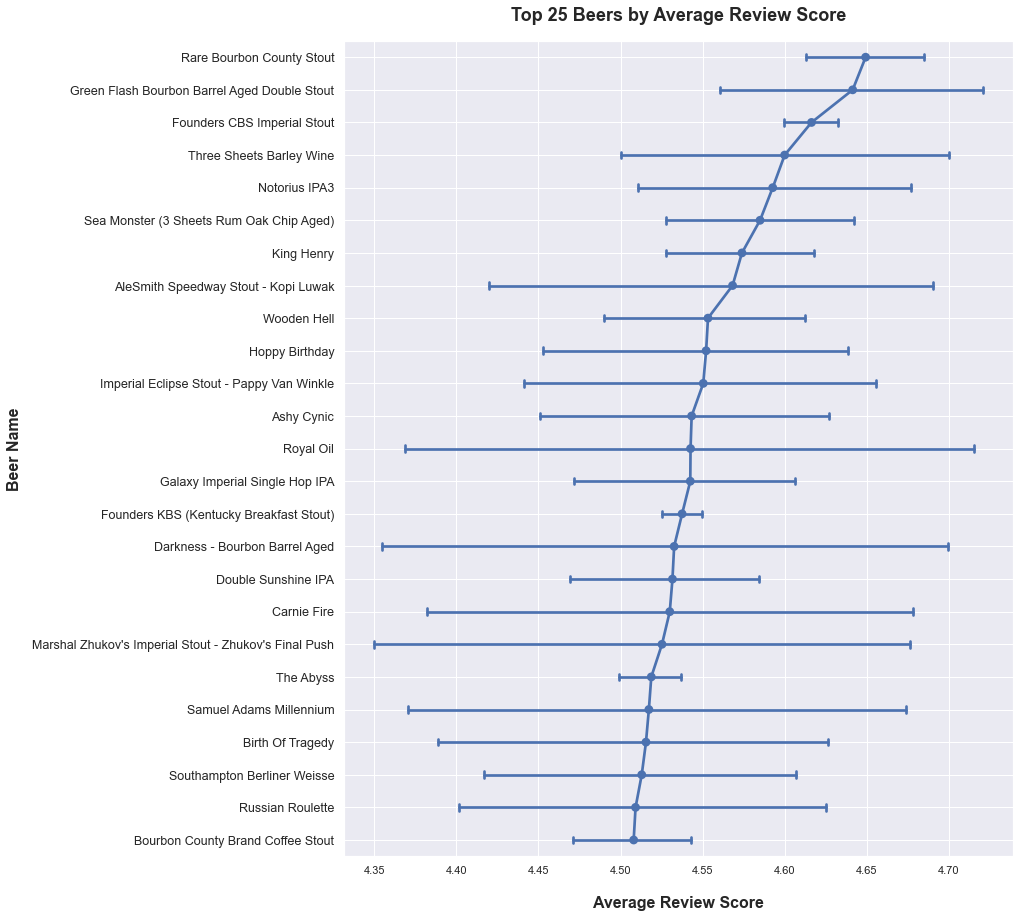

Press down to continue..


In [199]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

# filter out reviews with less than 10 reviews 
df_filter = beer_df_clean['beer_name'].value_counts()
df_filter = df_filter[df_filter>9].index
top25_df = beer_df_clean[beer_df_clean['beer_name'].isin(df_filter)]

# list of top 25
top25_list = top25_df.groupby('beer_name').mean().weighted_review.sort_values(ascending=False).head(25).index

# plot
sns.pointplot(data=top25_df, x='weighted_review', y='beer_name', order=top25_list, capsize=0.2)
plt.grid(True)
plt.title('Top 25 Beers by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5)
plt.show()
print('Press down to continue..');

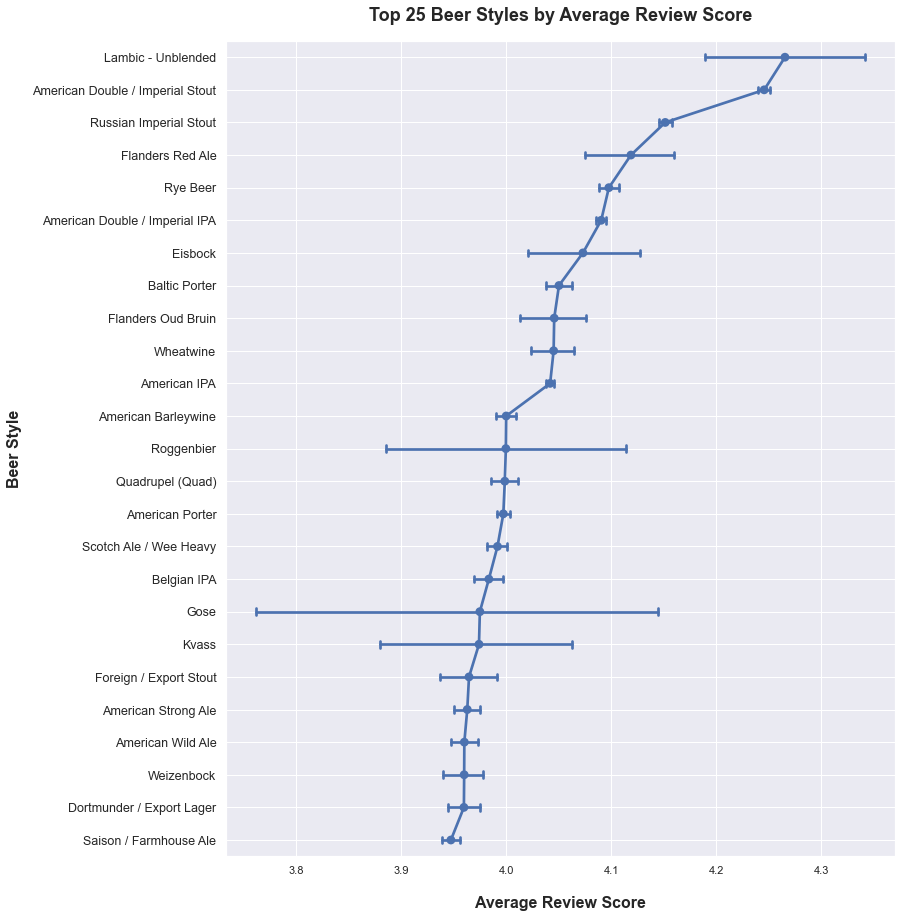

Press down to continue..


In [200]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

# filter out reviews with less than 10 reviews 
df_filter = beer_df_clean['beer_style'].value_counts()
df_filter = df_filter[df_filter>9].index
top25_df = beer_df_clean[beer_df_clean['beer_style'].isin(df_filter)]

# list of top 25
top25_list = top25_df.groupby('beer_style').mean().weighted_review.sort_values(ascending=False).head(25).index

# plot
sns.pointplot(data=top25_df, x='weighted_review', y='beer_style', order=top25_list, capsize=0.2)
plt.grid(True)
plt.title('Top 25 Beer Styles by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('Beer Style', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5)
plt.show()
print('Press down to continue..');

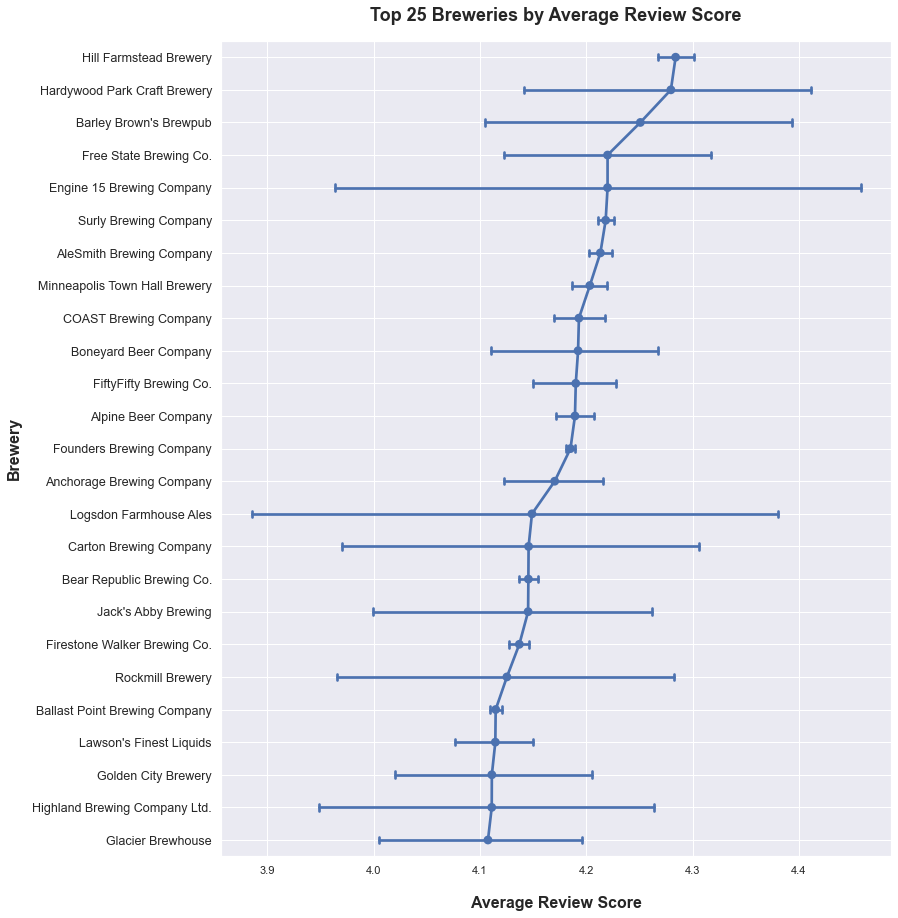

Press down to continue..


In [201]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

# filter out reviews with less than 10 reviews 
df_filter = beer_df_clean['brewery_name'].value_counts()
df_filter = df_filter[df_filter>9].index
top25_df = beer_df_clean[beer_df_clean['brewery_name'].isin(df_filter)]

# list of top 25
top25_list = top25_df.groupby('brewery_name').mean().weighted_review.sort_values(ascending=False).head(25).index

# plot
sns.pointplot(data=top25_df, x='weighted_review', y='brewery_name', order=top25_list, capsize=0.2)
plt.grid(True)
plt.title('Top 25 Breweries by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('Brewery', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5)
plt.show()
print('Press down to continue..');

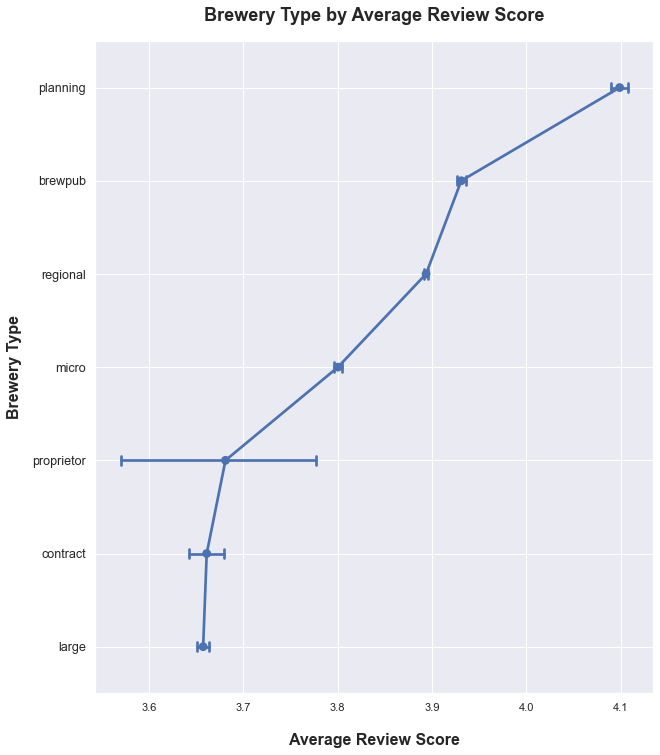

Press down to continue..


In [221]:
plt.figure(figsize=(10,12))
sns.set_theme(style='darkgrid')

top_list = beer_df_clean.groupby('brewery_type').mean().weighted_review.sort_values(ascending=False).index
sns.pointplot(data=beer_df_clean, x='weighted_review', y='brewery_type', order=top_list, capsize=0.1)
plt.grid(True)
plt.title('Brewery Type by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('Brewery Type', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5)
plt.show()
print('Press down to continue..');

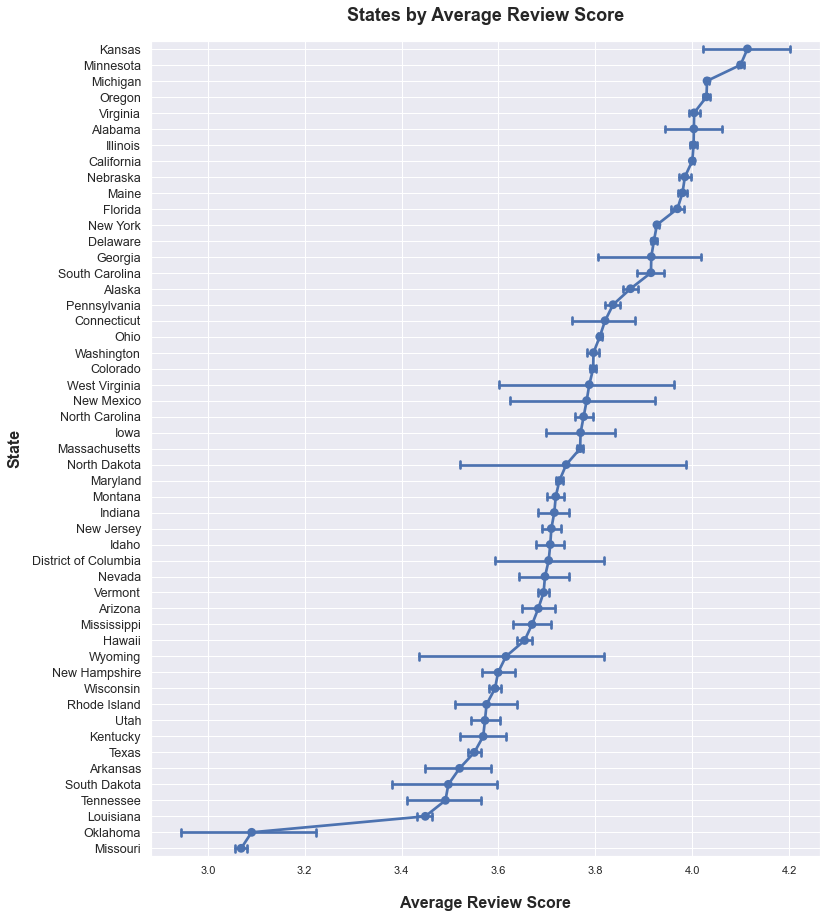

Press down to continue..


In [203]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

top_states = beer_df_clean.groupby('state').weighted_review.mean().sort_values(ascending=False).index
sns.pointplot(data=beer_df_clean, x='weighted_review', y='state', order=top_states, capsize=0.4)
plt.grid(True)
plt.title('States by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('State', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5)
plt.show()
print('Press down to continue..');

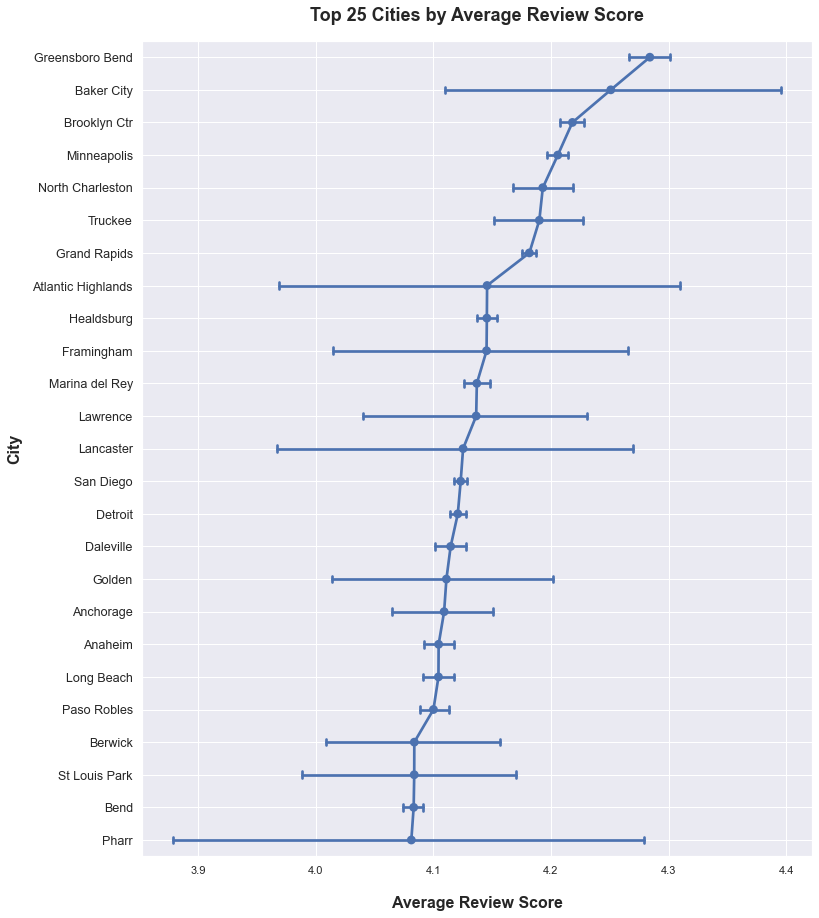

Press down to continue..


In [204]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

# filter out cities with less than 10 reviews
city_filter = beer_df_clean.city.value_counts()
city_filter = city_filter[city_filter>9].index
top_cities_df = beer_df_clean[beer_df_clean.city.isin(city_filter)]
# top 25
top25_cities = top_cities_df.groupby('city').mean().weighted_review.sort_values(ascending=False).head(25).index
# plot
sns.pointplot(data=top_cities_df, x='weighted_review', y='city', order=top25_cities, capsize=0.2)
plt.grid(True)
plt.title('Top 25 Cities by Average Review Score', fontsize=18, weight='bold', pad=20)
plt.ylabel('City', fontsize=16, weight='bold', labelpad=10)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
plt.yticks(fontsize=12.5) 
plt.show()
print('Press down to continue..');

## State and City Geospatial Visualizations

Next, I wanted to show the state and city data in a geospatial visualization in order to see if there were any geographical trends in the data.

A couple observations that are clear: states and cities tend to have higher ratings along the east and west coast, and they also tend to have higher ratings near fresh water, like the Great Lakes. 

*press down for visualizations..*
<br>
<br>
<br>

In [205]:
top_states = pd.read_csv('export_csv/state_data.csv')
top_cities = pd.read_csv('export_csv/city_data.csv')

In [219]:
fig = go.Figure(data = go.Choropleth(
    locations = top_states['state_code'],
    z = top_states['mean'],
    locationmode = 'USA-states',
    text = top_states['state']+'<br>'+\
            top_states['mean'].astype(str)+'<br>'+\
            '# of reviews: ' + top_states['count'].astype(str),
    hoverinfo = 'text',
    colorscale = 'Blues',
    colorbar = dict(
        ticks = 'outside',
        title = 'Review<br>Score',
        x = 0.95
        )))

fig.update_layout(
    title = dict(
        text = 'Average Beer Rating by State<br>(Hover for more info)',
        x = 0.48),
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)')
)

fig.show()
print('Press down to continue..');

Press down to continue..


In [220]:
limits = [1,2,3,4]
colors = ['lightcyan', 'rgb(59,59,59)', 'cornflowerblue', 'rgb(241,105,19)']

fig = go.Figure()

# trace for dummy data, used to populate a 1-2 marker in the legend. 
df_1_2 = top_cities.query("city == 'Dummy row'")    
fig.add_trace(go.Scattergeo(
    name = '1 - 2',
    visible = 'legendonly',
    showlegend = True,
    lon = df_1_2['longitude'],
    lat = df_1_2['latitude'],
    marker = dict(
        color = 'lightgrey',
        line_color = 'rgb(40,40,40)',
        line_width = 0.5,
        size = 8)))

# city review data
for i in range(len(limits)):
    df_sub = top_cities[top_cities['mean'].between(i+1, i+2)]
    df_sub['count'] = df_sub['count'].astype(int)
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['city'] +'<br>'+\
                df_sub['mean'].astype(str)+'<br>'+\
                '# of reviews: '+ df_sub['count'].astype(str),
        hoverinfo = 'text',
        name = f'{i+1} - {i+2}',
        marker = dict(
            color = colors[i],
            opacity = 0.8,
            size = 8,
            line_color = 'rgb(40,40,40)',
            line_width = 0.5)))
    
fig.update_layout(
        title = dict(
            text = 'Average Beer Rating by City<br>(Click on legend to toggle)',
            xanchor = 'center',
            x = 0.5),
        showlegend = True,
        legend = dict(
            title = 'Review Score',
            x = 0.95,
            y = 0.52),
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217,217,217)'))

## Top Rated Beer by ABV Quartiles (Alcohol by Volume)

This multivariate anlaysis included the variables, `beer_name`, `weighted_review`, and `beer_abv`. 

Similar to the previous visualization, I looked at the top 25 highest rated beers. However, here I looked at the top 25 for each quartile of `beer_abv`, i.e. the top 25 rated beers that have high alcohol content, medium alcohol content, and low alcohol content. 

The purpose of this analysis was to answer practical questions a beer drinker might have. For example, say someone wanted to find a highly rated beer that they could drink comfortably throughout the day in the summer. They could take a look at "Top Rated Low ABV Beer" to get some ideas. I'd imagine that most people don't want to drink a beer that has 8-9% ABV throughout the course of an entire day. To each his own though. 

(press down for visualizations)
<br>
<br>
<br>

In [208]:
top25_upper_abv = pd.read_csv('export_csv/upper_abv.csv')
top25_median_abv = pd.read_csv('export_csv/median_abv.csv')
top25_lower_abv = pd.read_csv('export_csv/lower_abv.csv')

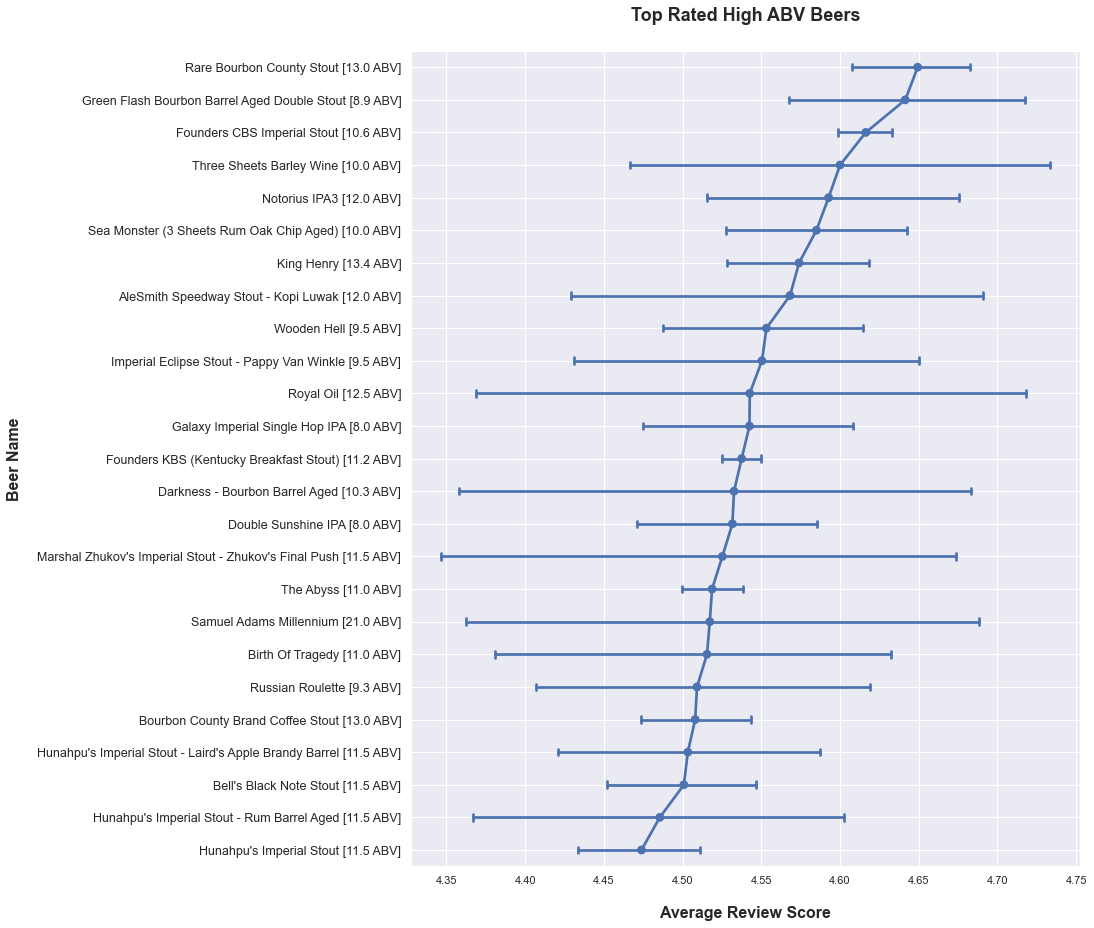

Press down to continue..


In [209]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

upperqrt_abv = beer_df_clean.query('beer_abv >= 8')
ax = sns.pointplot(data=upperqrt_abv, x='weighted_review', y='beer_name', order=top25_upper_abv.beer_name, capsize=0.2)
plt.grid(True)
plt.title('Top Rated High ABV Beers', fontsize=18, weight='bold', pad=30)
plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
# edit ytick labels to show ABV value
upper_abv = top25_upper_abv.beer_abv.tolist()
labels_upper = [item.get_text() for item in ax.get_yticklabels()]
labels_upper_abv = [f'{label} [{upper_abv[i]} ABV]' for i, label in enumerate(labels_upper)]
ax.set_yticklabels(labels_upper_abv, fontsize=12.5)
plt.show()
print('Press down to continue..');

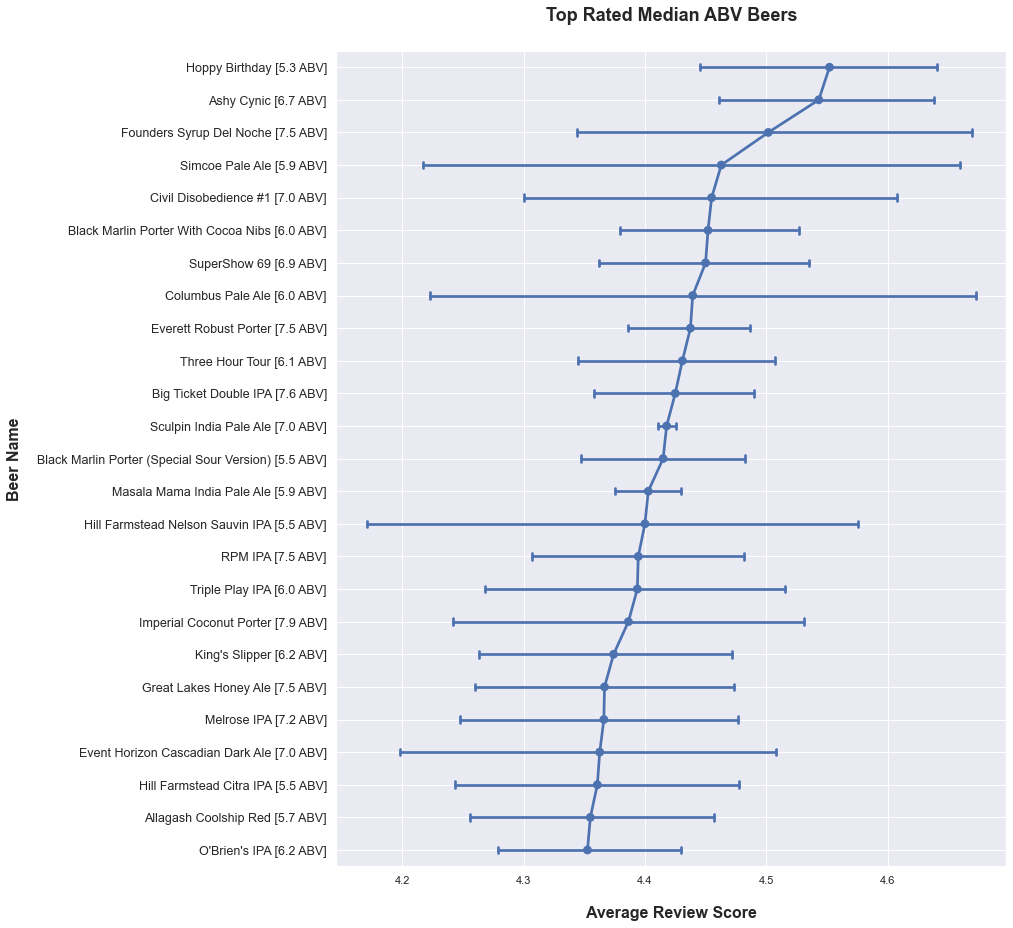

Press down to continue..


In [210]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

medianqrt_abv = beer_df_clean.query('5.2 < beer_abv < 8.0')
ax=sns.pointplot(data=medianqrt_abv, x='weighted_review', y='beer_name', order=top25_median_abv.beer_name, capsize=0.2)
plt.grid(True)
plt.title('Top Rated Median ABV Beers', fontsize=18, weight='bold', pad=30)
plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
median_abv = top25_median_abv.beer_abv.tolist()
labels_median = [item.get_text() for item in ax.get_yticklabels()]
labels_median_abv = [f'{label} [{median_abv[i]} ABV]' for i, label in enumerate(labels_median)]
ax.set_yticklabels(labels_median_abv, fontsize=12.5)
plt.show()
print('Press down to continue..');

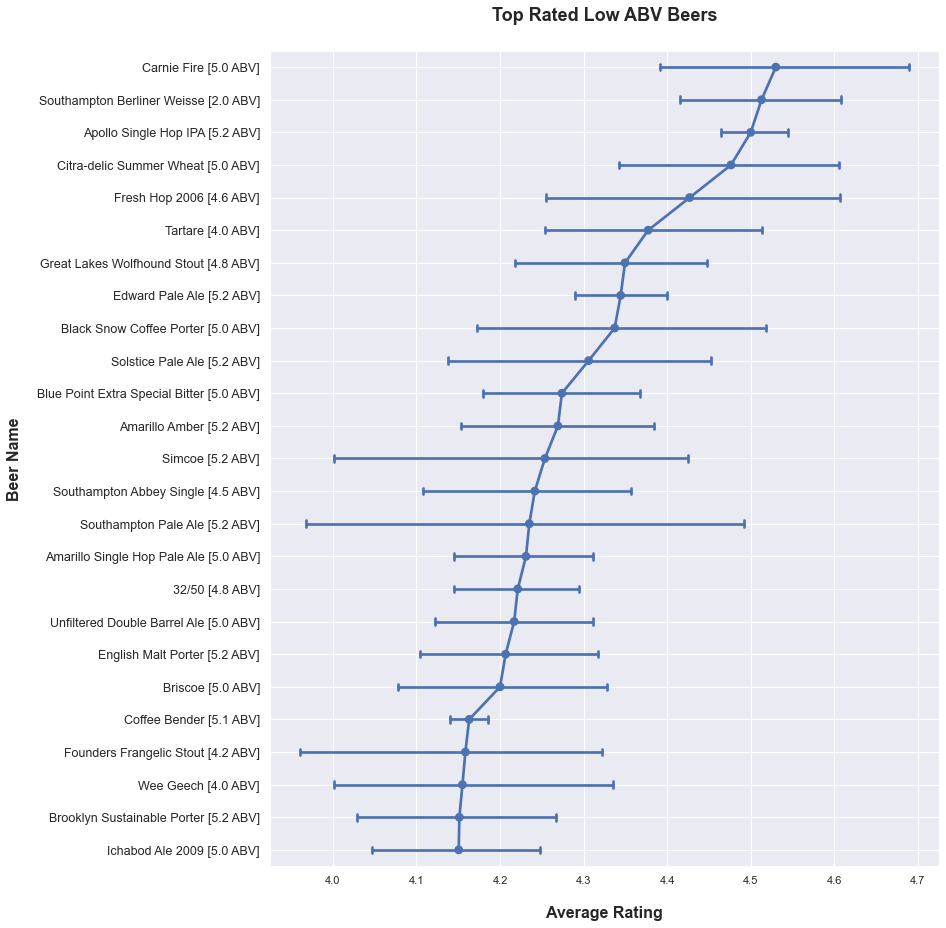

Press down to continue..


In [211]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

lowerqrt_abv = beer_df_clean.query('beer_abv <= 5.2')
ax = sns.pointplot(data=lowerqrt_abv, x='weighted_review', y='beer_name', order=top25_lower_abv.beer_name, capsize=0.2)
plt.grid(True)
plt.title('Top Rated Low ABV Beers', fontsize=18, weight='bold', pad=30)
plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
plt.xlabel('Average Rating', fontsize=16, weight='bold', labelpad=20)
lower_abv = top25_lower_abv.beer_abv.tolist()
labels_lower = [item.get_text() for item in ax.get_yticklabels()]
labels_low_abv = [f'{label} [{lower_abv[i]} ABV]' for i, label in enumerate(labels_lower)]
ax.set_yticklabels(labels_low_abv, fontsize=12.5)
plt.show()
print('Press down to continue..');

## Bivariate Relationships

Lastly, I took a quick look at the relationships between the review categories. Specifically, I wanted to focus on finding correlations with `review_overall`, since it represents the reviewer's overall impression of a beer. I didn't want to use `weighted_review` for finding correlations since it is a weighted average of the other review categories. 

Below is a correlation matrix for all variables, and a bar chart that isolates the correlations found with `review_overall`. In general, taste has the highest correlation with overall reviews, while appearance has the lowest correlation. In other words, we could say that taste is the most important factor when it comes to giving an overall review score, while appearance is the least important. 

*press down for visualizations..*
<br>
<br>
<br>

In [212]:
variables = ['beer_abv', 'weighted_review', 'review_overall', 'review_aroma', 
             'review_appearance', 'review_palate', 'review_taste']

corr_matrix = beer_df_clean[variables].corr()
display(corr_matrix.style.background_gradient(cmap='Blues').format( '{:0.2f}'))
print('Press down to continue..');

Press down to continue..


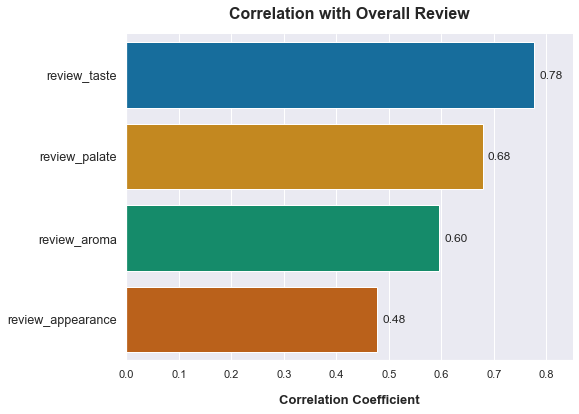

In [213]:
data_corr = corr_matrix['review_overall'].drop(['review_overall', 'weighted_review', 'beer_abv']).reset_index().sort_values('review_overall', ascending=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(data = data_corr, x='review_overall', y='index', palette='colorblind')
plt.title('Correlation with Overall Review', pad=15, fontsize=16, weight='bold')
plt.ylabel('')
plt.xlabel('Correlation Coefficient', labelpad=15, fontsize=13, weight='bold')
plt.xlim(0,0.85)
plt.yticks(fontsize=12.5)
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 1.8
    ax.annotate(format(bar_end, '0.2f'), (x,y))

## Multivariate Relationships

Now with multivariate relationships I wanted to look at the same correlations, however this time across the "top" reviewers. Top reviewers are determined by how many individual reviews they have given. 

Below you will find three visualizations, one with the top 10 reviewers, top 50 reviewers, and top 100 reviewers. In addition, you will see a small table for each correlation variable, which shows the variance for each. 

Across all three plots we can see a clear trend. Taste and palate reviews have the lowest variances and highest correlations, while aroma and appearance have the highest variances and lowest correlations. What this essentially means is that the correlations for taste and palate tend to be more consistent than those for aroma and appearance. You could then say, that as a whole, the top reviewers may have come to a conscious, or maybe subconscious, consensus that taste and palate are the most important factors when reviewing beer. Therefore, you may want to be careful when reading reviews from a reviewer who doesn't value taste and palate as much, unless of course that is what your interested in. For example, you could easily use the visualizations below to find a reviewer who highly values, say aroma, instead of taste or palate.

*press down for visualizations..*
<br>
<br>
<br>

In [214]:
reviewer_corr_df = pd.read_csv('export_csv/reviewer_corr.csv')
reviewer50_corr_df = pd.read_csv('export_csv/reviewer50_corr.csv')
reviewer100_corr_df = pd.read_csv('export_csv/reviewer100_corr.csv')

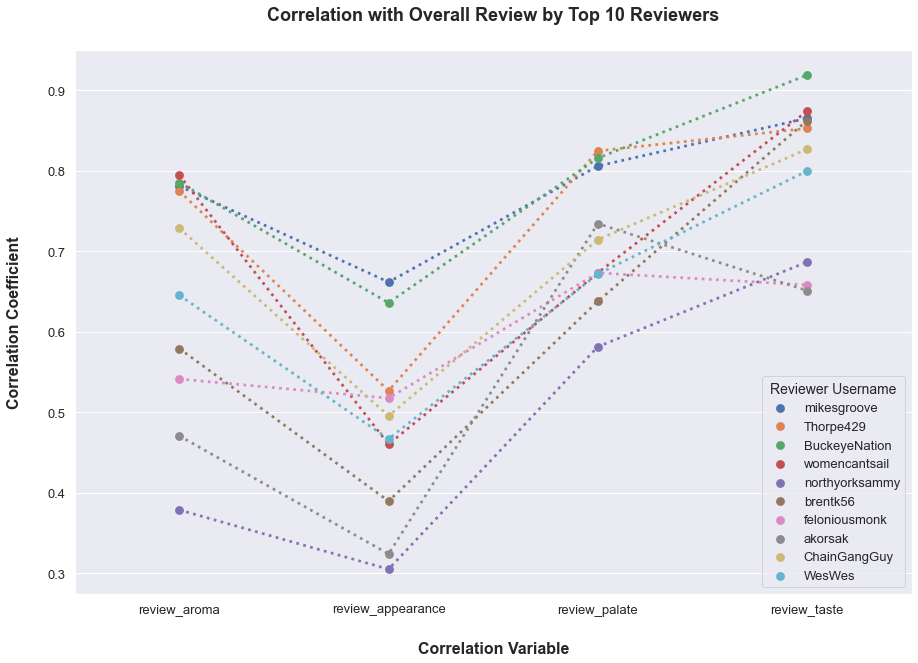


        Variances of
        corr_variable
review_aroma         0.022331
review_appearance    0.013891
review_palate        0.006672
review_taste         0.009610
Name: corr, dtype: float64

Press down to continue..



In [222]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

ax = sns.pointplot(data=reviewer_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'))
plt.title('Correlation with Overall Review by Top 10 Reviewers', weight='bold', fontsize=18, pad=30)
plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(title='Reviewer Username', title_fontsize=14, fontsize=13)
plt.show();

# Variance
print('')
print('        Variances of')
print(f"        {reviewer_corr_df.groupby('corr_variable', sort=False).var()['corr']}")
print('')
print('Press down to continue..')
print('')

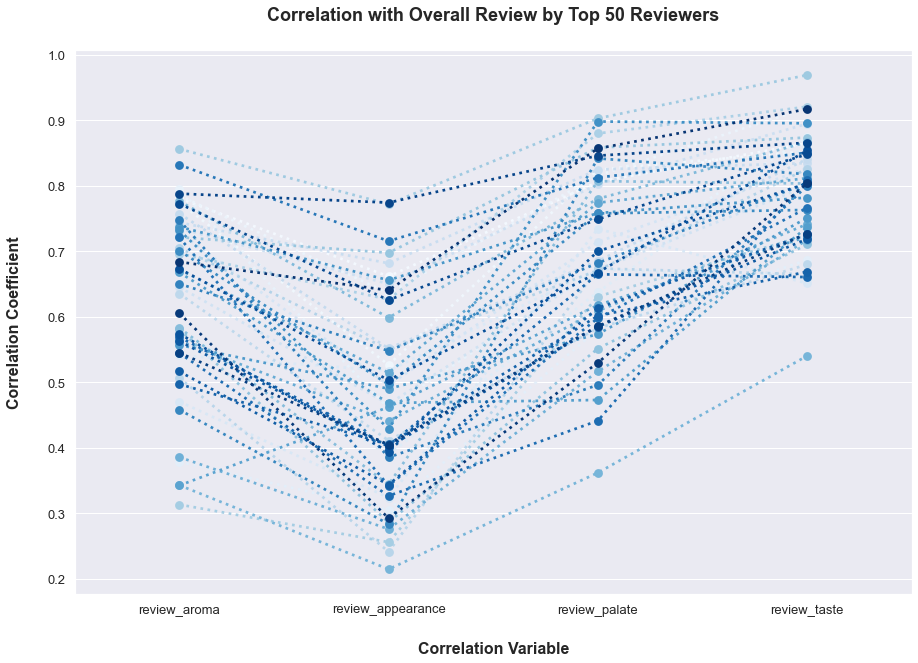


        Variances of
        corr_variable
review_aroma         0.018799
review_appearance    0.021591
review_palate        0.016276
review_taste         0.007682
Name: corr, dtype: float64

Press down to continue..



In [216]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

ax = sns.pointplot(data=reviewer50_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
plt.title('Correlation with Overall Review by Top 50 Reviewers', weight='bold', fontsize=18, pad=30)
plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.get_legend().remove()
plt.show();

print('')
print('        Variances of')
print(f"        {reviewer50_corr_df.groupby('corr_variable', sort=False).var()['corr']}")
print('')
print('Press down to continue..')
print('')

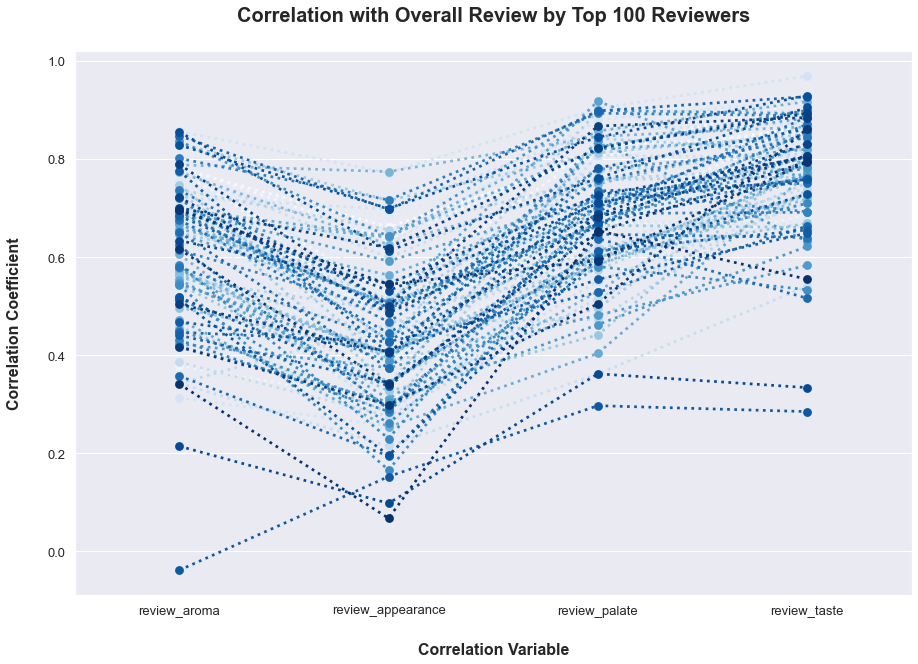


        Variances of
        corr_variable
review_aroma         0.024154
review_appearance    0.024114
review_palate        0.017546
review_taste         0.013823
Name: corr, dtype: float64




In [217]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

ax = sns.pointplot(data=reviewer100_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
plt.title('Correlation with Overall Review by Top 100 Reviewers', weight='bold', fontsize=20, pad=30)
plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.get_legend().remove()
plt.show();

print('')
print('        Variances of')
print(f"        {reviewer100_corr_df.groupby('corr_variable', sort=False).var()['corr']}")
print('')
print('')